In [1]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
DATA_FILENAME = "insurance.csv"
download_url(DATASET_URL,'.')

In [4]:
dataframe_raw = pd.read_csv("insurance.csv")
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
your_name="jennyej"
type(your_name)

str

In [82]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
        # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi*ord(rand_str[1])/100
    # scale target
    dataframe.charges = dataframe.charges* ord(rand_str[2])/100
     # drop column
    if ord(rand_str[3])%2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe
    

In [83]:
dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
619,55,female,37.47100,0,no,southwest,11785.008400
319,32,male,37.70835,1,no,northeast,5134.368415
34,28,male,36.76400,1,yes,southwest,56314.015054
403,49,male,32.62300,3,no,northwest,11296.406000
113,21,female,36.07720,0,no,northwest,2645.207180


In [85]:
num_rows=len(dataframe)
num_rows

1271

In [86]:
num_cols=len(dataframe.columns)
num_cols

7

In [91]:
input_cols=dataframe.columns
input_cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
for i in input_cols:
    print(i)

age
sex
bmi
children
smoker
region
charges


In [93]:
dataframe['age'].values

array([55, 32, 28, ..., 54, 18, 22])

In [101]:
categorical_cols=dataframe._get_numeric_data()
categorical_cols
    

,age,bmi,children,charges
619,55,37.47100,0,11785.008400
319,32,37.70835,1,5134.368415
34,28,36.76400,1,56314.015054
403,49,32.62300,3,11296.406000
113,21,36.07720,0,2645.207180
...,...,...,...,...
1065,42,25.55300,1,7750.048900
88,46,28.01740,0,8829.333260
177,54,29.49200,1,11479.705600
1170,18,27.63360,1,18896.550640


In [102]:
output_cols=dataframe["charges"]
output_cols

619     11785.008400
319      5134.368415
34      56314.015054
403     11296.406000
113      2645.207180
            ...     
1065     7750.048900
88       8829.333260
177     11479.705600
1170    18896.550640
1036    41232.894230
Name: charges, Length: 1271, dtype: float64

In [104]:
min(output_cols),max(output_cols),output_cols.mean()

(1234.06129, 70147.470811, 14556.481055325637)

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


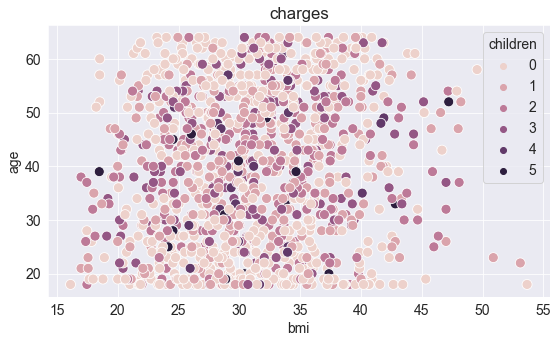

In [111]:
# Create a scatter plot
sns.scatterplot(dataframe.bmi, # X-axis
                dataframe.age,
                dataframe.children,# Y-axis
                hue=dataframe.charges,  # Dot color
                s=100);

# Chart title
plt.title("charges");

In [119]:
import jovian

In [122]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: The detected/provided file "Untitled.ipynb" does not exist. Please provide the correct notebook filename as the "filename" argument to "jovian.commit".


In [118]:
!pip install jovian --upgrade -q

Step 2: Prepare the dataset for training